<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_5_lvq_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LVQ

## Classificar dados com a função ```make_blobs```

Vamos gerar dados com a função ```make_blobs``` em um espaço de duas _features_ com 300 amostras divididas igualmente dentre três _clusters_ diferentes.

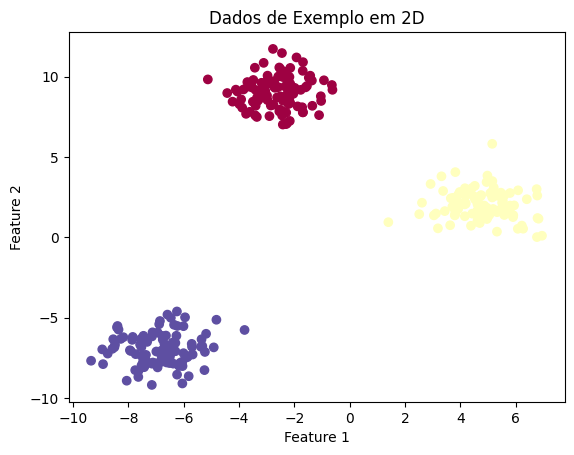

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Gerar dados de exemplo em 2D
n_samples = 300
n_features = 2
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Visualizar os dados gerados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Dados de Exemplo em 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Agora, vamos treinar o LVQ e visualizar os protótipos finais e os dados classificados.

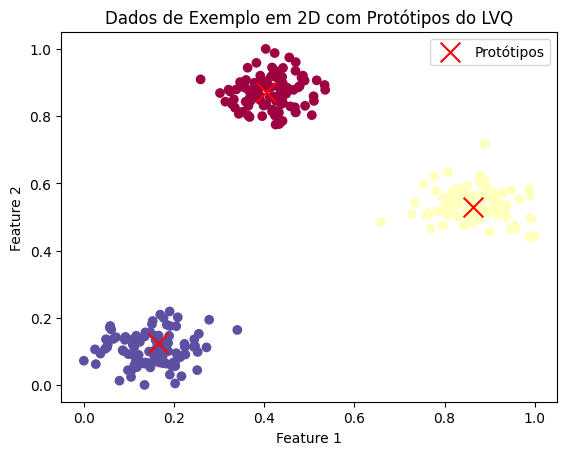

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# Normalizar os dados para [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Inicializar os protótipos (vetores de peso) aleatoriamente
n_prototypes = n_clusters
np.random.seed(0)
initial_prototypes = np.random.rand(n_prototypes, n_features)

# Definir hiperparâmetros do LVQ
learning_rate = 0.1
epochs = 100

# Treinar o LVQ
for epoch in range(epochs):
    for i, x in enumerate(X_normalized):
        # Encontrar o protótipo mais próximo
        neighbors = NearestNeighbors(n_neighbors=1).fit(initial_prototypes)
        nearest_prototype_idx = neighbors.kneighbors([x])[1][0][0]

        # Atualizar o protótipo mais próximo com base na classe verdadeira
        if y[i] == nearest_prototype_idx:
            initial_prototypes[nearest_prototype_idx] += learning_rate * (x - initial_prototypes[nearest_prototype_idx])
        else:
            initial_prototypes[nearest_prototype_idx] -= learning_rate * (x - initial_prototypes[nearest_prototype_idx])

# Visualizar os protótipos finais e os dados classificados
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap=plt.cm.Spectral)
plt.scatter(initial_prototypes[:, 0], initial_prototypes[:, 1], c='red', marker='x', s=200, label='Protótipos')
plt.title('Dados de Exemplo em 2D com Protótipos do LVQ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()